In [3]:
import pandas as pd
import numpy as np
string_data = pd.Series(["a","b",np.nan,"d"])
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [6]:
data= pd.Series([1,np.nan,3.5,np.nan,7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [7]:
from numpy import nan as NA
data = pd.DataFrame([[1,6.5,3],[1,NA,NA],[NA,NA,NA],[NA,6.5,3]])
cleandata1 = data.dropna() 
cleandata1 # na값 제거하니 너무 데이터가 적어짐

cleandata2 = data.dropna(how='all') # na값이 모두인 것만 제거
cleandata2 

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [20]:
df=pd.DataFrame(np.random.randn(7,3))
df.iloc[:4,1]= NA
df.iloc[:2,2]= NA
df

,0,1,2
0,-1.751369,NaN,NaN
1,-0.579259,NaN,NaN
2,-1.151339,NaN,0.082964
3,0.233040,NaN,0.497117
4,-0.381841,0.797107,0.351023
5,0.154170,0.204850,-0.636794
6,0.197111,0.025079,0.000778


In [10]:
df.dropna()

,0,1,2
4,2.101312,-0.550617,-0.853164
5,-0.877201,-0.128328,1.319216
6,0.831029,0.280679,2.601274


In [11]:
df.dropna(thresh=2) #원하는 nan값을 선택하고 싶으면 thresh옵션

,0,1,2
2,0.000352,NaN,0.814172
3,0.927917,NaN,1.074799
4,2.101312,-0.550617,-0.853164
5,-0.877201,-0.128328,1.319216
6,0.831029,0.280679,2.601274


In [15]:
df.dropna(thresh=1) 

,0,1,2
0,1.969228,NaN,NaN
1,0.907652,NaN,NaN
2,0.000352,NaN,0.814172
3,0.927917,NaN,1.074799
4,2.101312,-0.550617,-0.853164
5,-0.877201,-0.128328,1.319216
6,0.831029,0.280679,2.601274


In [16]:
df2=df.fillna(0)
df2
df.fillna(0,inplace=True)

In [17]:
df

,0,1,2
0,1.969228,0.000000,0.000000
1,0.907652,0.000000,0.000000
2,0.000352,0.000000,0.814172
3,0.927917,0.000000,1.074799
4,2.101312,-0.550617,-0.853164
5,-0.877201,-0.128328,1.319216
6,0.831029,0.280679,2.601274


In [26]:
df=pd.DataFrame(np.random.randn(6,3))
df.iloc[2:,1]= NA
df.iloc[4:,2]= NA
df

,0,1,2
0,-1.667886,0.027717,-1.373834
1,0.197706,-1.279373,-1.167071
2,0.586873,NaN,0.125437
3,0.239117,NaN,1.910741
4,-1.863838,NaN,NaN
5,0.021445,NaN,NaN


In [27]:
df.fillna(method='ffill')

,0,1,2
0,-1.667886,0.027717,-1.373834
1,0.197706,-1.279373,-1.167071
2,0.586873,-1.279373,0.125437
3,0.239117,-1.279373,1.910741
4,-1.863838,-1.279373,1.910741
5,0.021445,-1.279373,1.910741


In [30]:
df.fillna(method='ffill',limit=2)  #ffill 방식은 기존에 앞에 끊긴 데이터를 빈값에 그대로 채워주기 때문에 별로 요구되지 않는다. 차라리 평균대체를 하는 것이 좋다.

,0,1,2
0,-1.667886,0.027717,-1.373834
1,0.197706,-1.279373,-1.167071
2,0.586873,-1.279373,0.125437
3,0.239117,-1.279373,1.910741
4,-1.863838,NaN,1.910741
5,0.021445,NaN,1.910741


In [31]:
data = pd.DataFrame({'k1':['one','two']*3+['two'],
                    'k2':[1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [34]:
data.duplicated()

,k1,k2
6,two,4


In [35]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [36]:
data['v1']=range(7)

In [43]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [46]:
data.drop_duplicates(['k1','k2'],keep="last") #keep=last 는 중복이 판정 날때 뒤에 것을 선택해서 출력한다. 앞에 것을 선택하는 옵션은 first

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5


In [40]:
data.drop_duplicates(['k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [41]:
data.drop_duplicates(['v1'])

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [1]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]

In [3]:
bins = [18,25,35,60,100]

In [4]:
cats = pd.cut(ages, bins)   #원하는 구간을 설정해서 변수들 구간을 묶어 줄 수 있음.
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [5]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [2]:
import re
text = "foo bar\t baz \tqux"
print(text)

foo bar	 baz 	qux


In [7]:
re.split('\s+',text)

['foo', 'bar', 'baz', 'qux']

In [4]:
text = """Dave dave@naver.com
Steve steve@google.com
Rob rob@google.com
Ryan ryan@google.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+.[A-Z]{2,4}'
regax=re.compile(pattern,flags=re.IGNORECASE)

In [5]:
regax.findall(text)

['dave@naver.com', 'steve@google.com', 'rob@google.com', 'ryan@google.com']

In [6]:
data = pd.Series(np.random.randn(9),
                index=['a','a','a','b','b','c','c','d','d'])
data

a   -0.070904
a   -1.178259
a    0.780930
b    2.588954
b    1.421460
c    0.533257
c   -1.907198
d    0.128909
d   -0.600553
dtype: float64

In [7]:
data = pd.Series(np.random.randn(9),
                index=[['a','a','a','b','b','c','c','d','d'],
                      [1,2,3,1,2,1,2,1,2]])
data

a  1    0.201286
   2    0.400986
   3    0.673097
b  1   -1.996785
   2    0.750602
c  1   -1.681996
   2    0.666879
d  1    1.094617
   2   -1.002036
dtype: float64

In [9]:
data.a

1    0.201286
2    0.400986
3    0.673097
dtype: float64

In [10]:
data['a']

1    0.201286
2    0.400986
3    0.673097
dtype: float64

In [17]:
data.loc[['b','d']]

b  1   -1.996785
   2    0.750602
d  1    1.094617
   2   -1.002036
dtype: float64

In [18]:
data[['a','b']]

a  1    0.201286
   2    0.400986
   3    0.673097
b  1   -1.996785
   2    0.750602
dtype: float64

In [19]:
data[['b','d']]

b  1   -1.996785
   2    0.750602
d  1    1.094617
   2   -1.002036
dtype: float64

In [21]:
data.loc['b',2]

0.7506020340113407

In [22]:
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'], 'data1':[0,1,2,3,4,5,6]})
df2 = pd.DataFrame({'key':['a','b','c'], 'data2':[0,1,2]})

In [26]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,2


In [27]:
pd.merge(df1,df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,2


In [28]:
df3 = pd.DataFrame({'l_key':['b','b','a','c','a','a','b'], 'data1':[0,1,2,3,4,5,6]})
df4 = pd.DataFrame({'r_key':['a','b','c'], 'data2':[0,1,2]})

In [30]:
pd.merge(df3,df4,left_on="l_key",right_on="r_key")

,l_key,data1,r_key,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0
6,c,3,c,2


In [32]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [33]:
np.concatenate([arr,arr], axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [35]:
np.concatenate([arr,arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [37]:
s1 = pd.Series([0,1], index=["a","b"])
s2 = pd.Series([2,3,4], index=["c","d","e"])
s3 = pd.Series([5,6], index=["f","g"])
print(s1);print(s2);print(s3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64


In [38]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [39]:
pd.concat([s1,s2,s3],axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [40]:
df1 = pd.DataFrame(np.random.randn(3,4), columns=['a','b','c','d'])
df2 = pd.DataFrame(np.random.randn(2,3), columns=['b','d','a'])
df1

,a,b,c,d
0,-0.301705,1.372495,-0.263138,-0.674968
1,-1.078902,-0.343307,-1.998330,0.653537
2,0.556584,-0.333587,0.326782,-0.636708


In [41]:
df2

,b,d,a
0,0.193938,0.264191,-0.775801
1,1.410540,2.386957,0.921746


In [42]:
pd.concat([df1,df2])

,a,b,c,d
0,-0.301705,1.372495,-0.263138,-0.674968
1,-1.078902,-0.343307,-1.998330,0.653537
2,0.556584,-0.333587,0.326782,-0.636708
0,-0.775801,0.193938,NaN,0.264191
1,0.921746,1.410540,NaN,2.386957


In [45]:
pd.concat([df1,df2], ignore_index=True)

,a,b,c,d
0,-0.301705,1.372495,-0.263138,-0.674968
1,-1.078902,-0.343307,-1.998330,0.653537
2,0.556584,-0.333587,0.326782,-0.636708
3,-0.775801,0.193938,NaN,0.264191
4,0.921746,1.410540,NaN,2.386957


# 시계열 자료 다운 샘플링

In [47]:
rng = pd.date_range('2000-01-01',periods=12,freq='T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [49]:
ts = pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [50]:
ts.resample('5min',closed='right').sum() #5분단위로 묶어냄 sum() 합계 방식을 통해서

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [54]:
ts.resample('5min',closed='right').mean() #5분단위로 묶어냄 mean() 평균 방식을 통해서 

1999-12-31 23:55:00     0
2000-01-01 00:00:00     3
2000-01-01 00:05:00     8
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [63]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range("1/1/2000",periods=2, freq='W-WED'),
                    columns=["Colorado","Texas","New York","Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.700755,1.582982,2.904154,-0.672396
2000-01-12,0.619417,-0.478825,0.264856,0.411625


In [65]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.700755,1.582982,2.904154,-0.672396
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.619417,-0.478825,0.264856,0.411625


In [66]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.700755,1.582982,2.904154,-0.672396
2000-01-06,-1.700755,1.582982,2.904154,-0.672396
2000-01-07,-1.700755,1.582982,2.904154,-0.672396
2000-01-08,-1.700755,1.582982,2.904154,-0.672396
2000-01-09,-1.700755,1.582982,2.904154,-0.672396
2000-01-10,-1.700755,1.582982,2.904154,-0.672396
2000-01-11,-1.700755,1.582982,2.904154,-0.672396
2000-01-12,0.619417,-0.478825,0.264856,0.411625


In [67]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.700755,1.582982,2.904154,-0.672396
2000-01-06,-1.700755,1.582982,2.904154,-0.672396
2000-01-07,-1.700755,1.582982,2.904154,-0.672396
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.619417,-0.478825,0.264856,0.411625


In [68]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.700755,1.582982,2.904154,-0.672396
2000-01-13,0.619417,-0.478825,0.264856,0.411625


In [71]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.700755,1.582982,2.904154,-0.672396
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.619417,-0.478825,0.264856,0.411625


In [70]:
df_daily.interpolate(method="values")  # 첫 값과 마지막 값을 판단하여 단계적으로 구간화한 값을 넣어준다.

,Colorado,Texas,New York,Ohio
2000-01-05,-1.700755,1.582982,2.904154,-0.672396
2000-01-06,-1.369302,1.288438,2.527112,-0.517536
2000-01-07,-1.037848,0.993895,2.150069,-0.362676
2000-01-08,-0.706395,0.699351,1.773026,-0.207816
2000-01-09,-0.374942,0.404807,1.395984,-0.052956
2000-01-10,-0.043489,0.110263,1.018941,0.101905
2000-01-11,0.287964,-0.184281,0.641898,0.256765
2000-01-12,0.619417,-0.478825,0.264856,0.411625


In [73]:
close_px_all=pd.read_csv('examples/stock_px_2.csv',
                        parse_dates=True, index_col=0)

In [74]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

<AxesSubplot:>

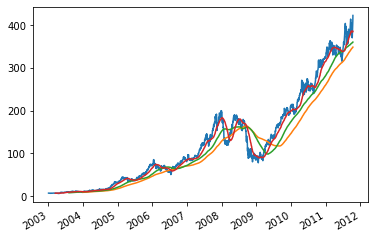

In [79]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot() # 250일 크기의 움직이는 창을 통해 그룹핑
close_px.AAPL.rolling(150).mean().plot() # 150일 크기의 움직이는 창을 통해 그룹핑
close_px.AAPL.rolling(50).mean().plot() # 50일 크기의 움직이는 창을 통해 그룹핑

In [82]:
path = "pydata-book-2nd-edition/datasets/bitly_usagov/example.txt"
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [111]:
import json
path = "pydata-book-2nd-edition/datasets/bitly_usagov/example.txt"
records = [json.loads(line) for line in open(path,encoding="UTF-8")]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [112]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [113]:
def get_counts(seq):
    counts={}
    for x in seq:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

In [114]:
counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [115]:
len(time_zones)

3440

In [116]:
frame = pd.DataFrame(records)

In [117]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [118]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [119]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [120]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz==''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

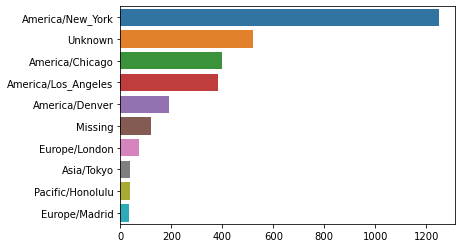

In [121]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)